# Quantum Bayesian Inference with Qiskit

##### Quantum Bayesian inference allows us to use quantum computing to perform inference on Bayesian networks, potentially leveraging quantum parallelism for more efficient computation. This tutorial will guide you through the process of using the QBayesian class to perform such inference tasks.

# Step 1: Creating Rotations for Bayesian Network

A Bayesian network can be represented as a quantum circuit where each node is a qubit, and the edges are quantum gates that represent the conditional dependencies. In this example we consider a simple Bayesian network that is only based on a chain of nodes.

In [12]:
# Include libraries
import numpy as np

# Define rotation angles
theta_A = 2 * np.arcsin(np.sqrt(0.2))
theta_B_A = 2 * np.arcsin(np.sqrt(0.9))
theta_B_nA = 2 * np.arcsin(np.sqrt(0.3))

# Step 2: Create a Quantum Circuit for Bayesian Network

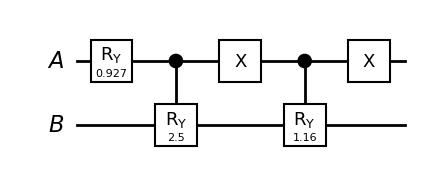

In [13]:
from qiskit import QuantumRegister
from qiskit import QuantumCircuit
# Define quantum registers 
qrA = QuantumRegister(1, name='A')
qrB = QuantumRegister(1, name='B')

# Define a 2-qubit quantum circuit
qc = QuantumCircuit(qrA, qrB, name="Bayes net small")
#Apply the R_Y_theta rotation gate on the first qubit
qc.ry(theta_A, 0)
# Apply the controlled-R_Y_theta rotation gate
qc.cry(theta_B_A, control_qubit=qrA, target_qubit=qrB)
# Apply the X gate on the first qubit
qc.x(0)
# Apply the controlled-R_Y_theta rotation gate
qc.cry(theta_B_nA, control_qubit=qrA, target_qubit=qrB)
# Apply another X gate on the first qubit
qc.x(0)
qc.draw('mpl', style='bw', plot_barriers=False, justify='none', fold=-1)

# Step 3: Perform Inference

In [14]:
from qiskit_machine_learning.algorithms .inference import QBayesian

query = {'B': 0}
evidence = {'A': 1}
# Initialize quantum bayesian
qbayesian = QBayesian(circuit=qc)
# Inference
qbayesian.inference(query=query, evidence=evidence)

0.11883

# Step 4: Generalize the approach for n nodes

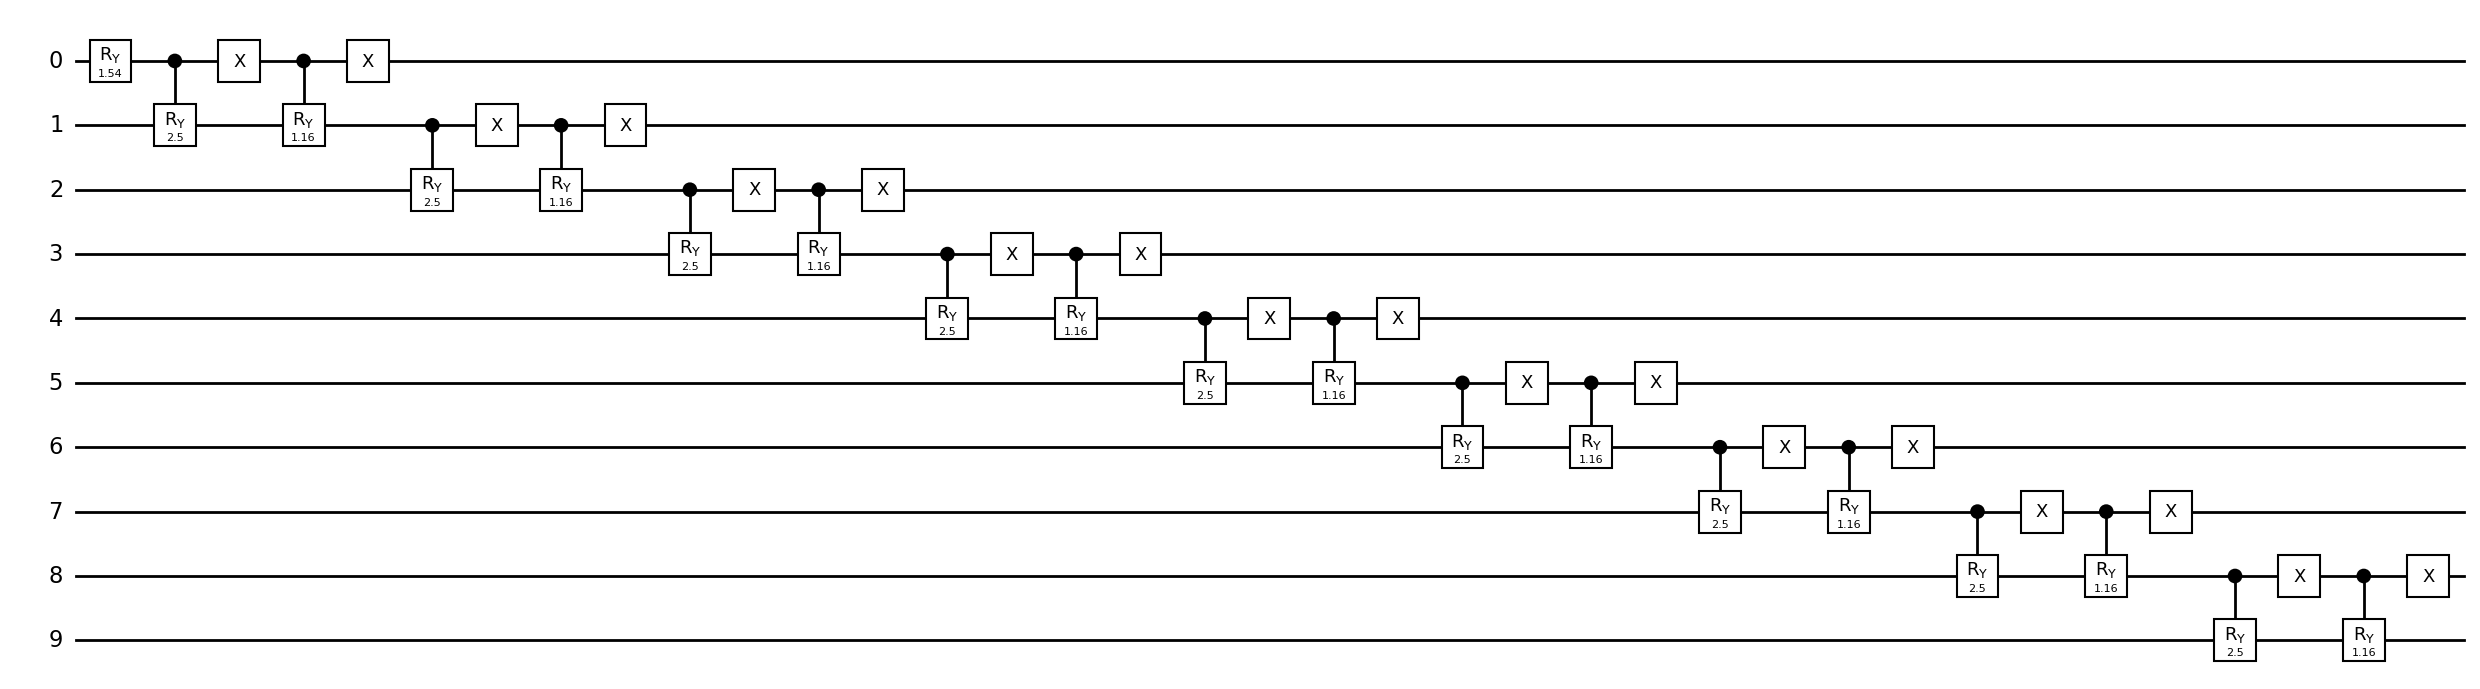

In [15]:
# Choose the number of nodes
n = 10 
# Generate probabilities
prob = np.random.random_sample(2*(n-1)+1)
theta = [2 * np.arcsin(np.sqrt(p)) for p in prob]
# Define quantum registers 
qr = [QuantumRegister(1, name=str(i)) for i in range(n)]
# Generate circuit
qc = QuantumCircuit(*qr, name="Bayes net")
#Apply the R_Y_theta rotation gate on the first qubit
qc.ry(theta[0], 0)
# Apply the controlled-R_Y_theta rotations
for i in range(1, n, 1):
    qc.cry(theta_B_A, control_qubit=i-1, target_qubit=i)
    qc.x(i-1)
    qc.cry(theta_B_nA, control_qubit=i-1, target_qubit=i)
    qc.x(i-1)
# Draw circuit
qc.draw('mpl', style='bw', plot_barriers=False, justify='none', fold=-1)

# Step 5: Inference

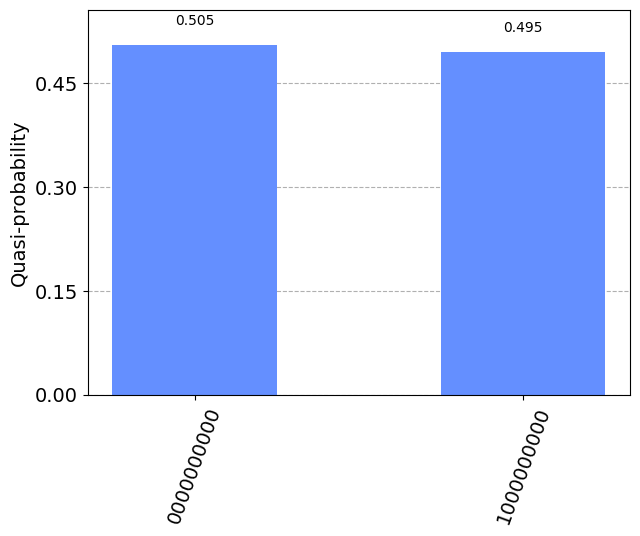

In [17]:
from qiskit.visualization import plot_histogram

evidence = {str(i): 0 for i in range(n-1)}
# Initialize quantum bayesian
qbayesian = QBayesian(circuit=qc)
# Inference
samples = qbayesian.rejectionSampling(evidence=evidence)

plot_histogram(samples)